In [ ]:
# LGBM & XGBM Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('/content/Titanic_train.csv')
test_data=pd.read_csv('/content/Titanic_test.csv')

In [3]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#2: Check for Missing Values

In [4]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Set plot style
sns.set(style="whitegrid")

In [6]:
# Select numeric columns for visualization
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

In [ ]:
# 3: Visualize Data Distributions

In [ ]:
#Plot Histograms for Numeric Columns

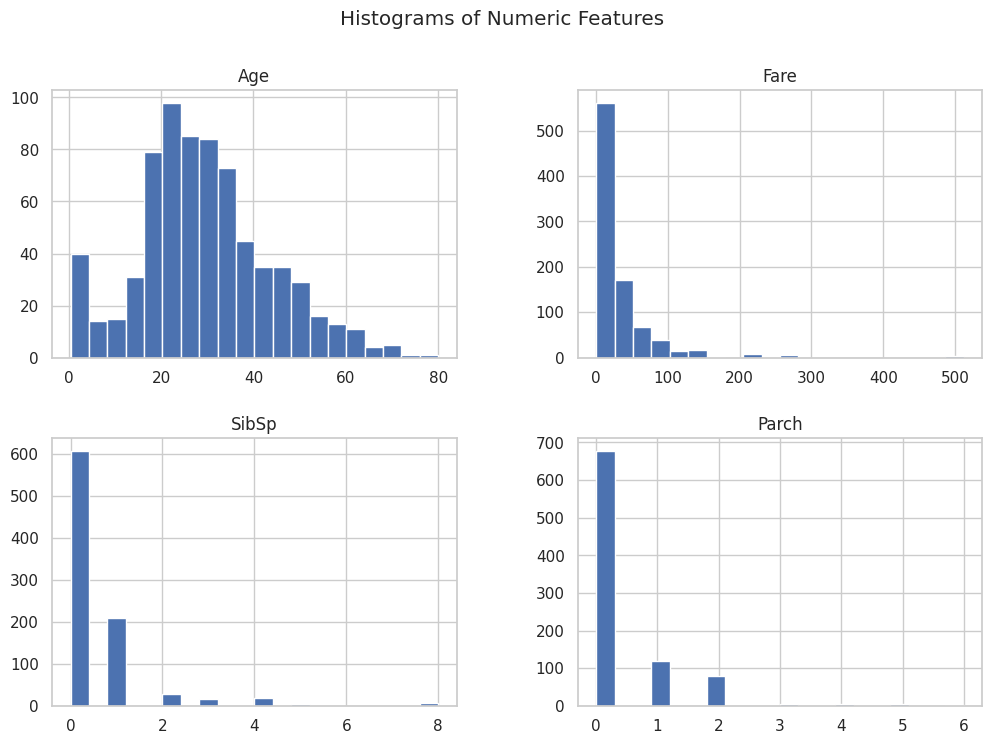

In [7]:
# Plot histograms
train_data[numeric_cols].hist(bins=20, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [ ]:
#  Plot Boxplots to Check for Outliers and Relationships with Survival

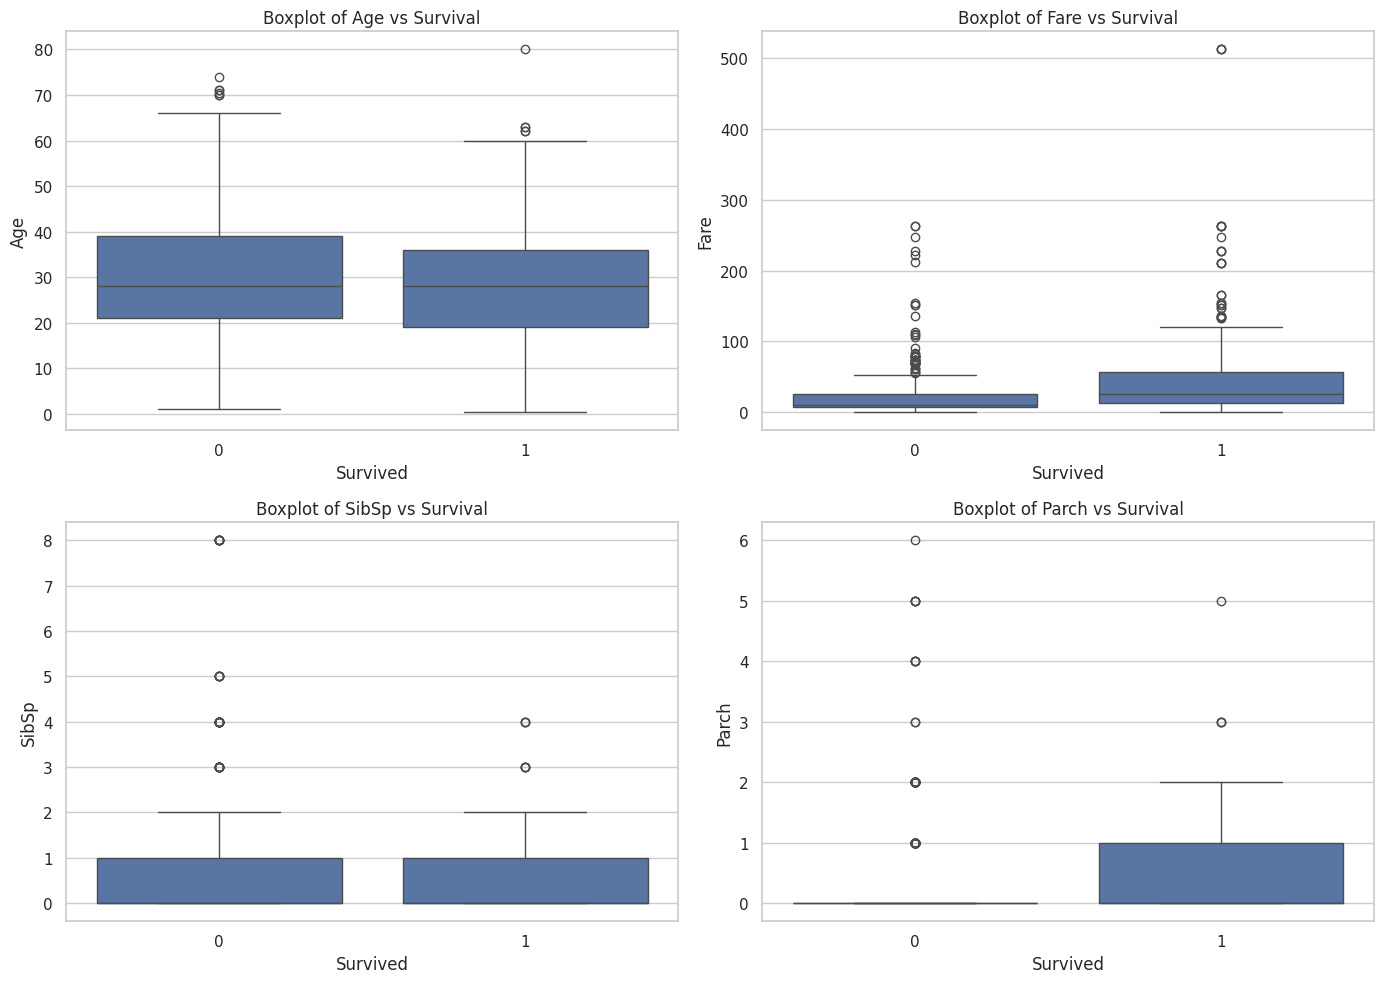

In [8]:
# Boxplots for numeric features vs survival
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Survived', y=col, data=train_data)
    plt.title(f'Boxplot of {col} vs Survival')
plt.tight_layout()
plt.show()

In [ ]:
#  4: Visualize Categorical Data ,# To visualize the relationships between categorical variables (Sex, Pclass, Embarked) and the target (Survived).

In [ ]:
# Bar Plots for Categorical Variables

In [9]:
# Bar plots for categorical variables vs survival
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

Text(0.5, 1.0, 'Survival Rate by Sex')

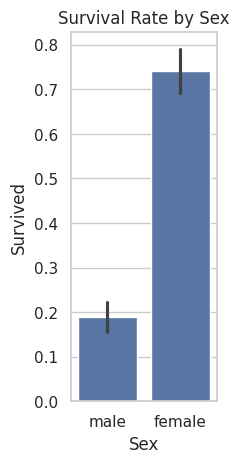

In [10]:
# Survival by Sex
plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')

Text(0.5, 1.0, 'Survival Rate by Pclass')

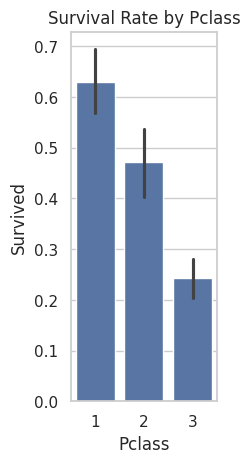

In [11]:
# Survival by Pclass
plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')

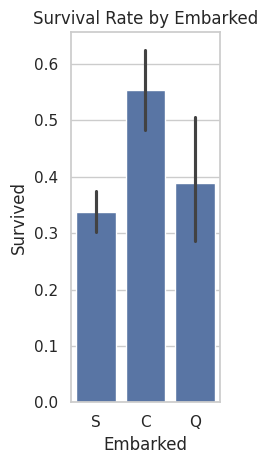

In [12]:
# Survival by Embarked
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked')

plt.tight_layout()
plt.show()

In [ ]:
# 5: Impute Missing Values, # to handle missing values for columns like Age, Cabin, and Embarked.

In [13]:
# Fill missing values in Age with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [14]:
# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [15]:
# Drop Cabin column (too many missing values)
train_data.drop(columns=['Cabin'], inplace=True)

In [ ]:
# 6: Encode Categorical Variables,# we can use pandas' get_dummies for one-hot encoding.

In [16]:
# One-hot encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [ ]:
# 7: Split Data into Train and Test Sets, # split the data into features (X) and target (y), and then further split into training and testing sets.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Features and target
X = train_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_data['Survived']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 8: Train and Evaluate Models (LightGBM and XGBoost),# we can train and evaluate both models using LightGBM and XGBoost.

In [ ]:
# Train a LightGBM Model

In [20]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [21]:
# LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

In [22]:
# Train the model
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [23]:
# Make predictions
lgb_predictions = lgb_clf.predict(X_test)

In [24]:
# Evaluate accuracy
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print(f'LightGBM Accuracy: {lgb_accuracy}')

LightGBM Accuracy: 0.8324022346368715


# Conclusion:

83.24% accuracy is good for the Titanic dataset and slightly better than XGBoost's performance. However, it's important to consider other metrics, especially due to the class imbalance, to ensure the model performs well for both survivors and non-survivors.

In [ ]:
# Train an XGBoost Model

In [25]:
import xgboost as xgb

In [26]:
# XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [27]:
# Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [28]:
# Make predictions
xgb_predictions = xgb_clf.predict(X_test)


In [29]:
# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')

XGBoost Accuracy: 0.8212290502793296


# Conclusion:

82.12% accuracy is quite good for the Titanic dataset. However, it's essential to complement this with other metrics, especially for imbalanced datasets like this one, to ensure the model is performing well across both classes (survivors and non-survivors).

In [ ]:
#9: Cross-Validation and Hyperparameter Tuning (Optional)
## We can improve the model's performance by tuning hyperparameters and using cross-validation. can apply GridSearchCV for this purpose.

In [ ]:
# Cross-Validation, the model's performance more reliably by splitting the data into multiple train-test sets and averaging the results.

In [ ]:
#we can use cross_val_score from sklearn to perform K-Fold Cross-Validation. This applies to both LightGBM and XGBoost.

In [30]:
from sklearn.model_selection import cross_val_score


# Cross-Validation Helps:

1.More Reliable Performance: It gives you an average score over multiple splits, reducing the risk of performance variation due to a single train-test split.

2.Prevents Overfitting: Helps assess how well the model generalizes to unseen data, preventing overfitting on the training set.


In [31]:
# Number of folds (5 or 10 is common)
cv_folds = 5

In [32]:
# Cross-validation for LightGBM
lgb_cv_scores = cross_val_score(lgb_clf, X_train, y_train, cv=cv_folds, scoring='accuracy')
print(f'LightGBM Cross-Validation Accuracy (mean): {lgb_cv_scores.mean()}')


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [33]:
# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=cv_folds, scoring='accuracy')
print(f'XGBoost Cross-Validation Accuracy (mean): {xgb_cv_scores.mean()}')

XGBoost Cross-Validation Accuracy (mean): 0.79915295971634


# Conclusion:
The model is doing okay but need to  be improved.


In [ ]:
#  Hyperparameter Tuning

In [ ]:
#Hyperparameter tuning is the process of finding the best set of hyperparameters that maximize model performance. Each model (like LightGBM or XGBoost) has several hyperparameters (e.g., learning rate, number of trees, max depth) that control the training process.

In [ ]:
# to Implement Hyperparameter Tuning:
 # can use GridSearchCV or RandomizedSearchCV from sklearn to perform hyperparameter tuning. Let's see examples for both LightGBM and XGBoost.

In [ ]:
# 1 LightGBM: Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Define the hyperparameters grid
lgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'num_leaves': [20, 31, 50]
}

In [36]:
# Initialize the model
lgb_clf = lgb.LGBMClassifier()


In [37]:
# Set up GridSearchCV
lgb_grid_search = GridSearchCV(estimator=lgb_clf, param_grid=lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [38]:
# Fit the grid search model
lgb_grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [20, 31, 50]},
             scoring='accuracy')

In [39]:
# Best hyperparameters and best accuracy score
print(f'Best Hyperparameters for LightGBM: {lgb_grid_search.best_params_}')
print(f'Best Accuracy for LightGBM: {lgb_grid_search.best_score_}')

Best Hyperparameters for LightGBM: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 20}
Best Accuracy for LightGBM: 0.8384713877671626


# Conclusion:

The result is very good, indicating that the LightGBM model is well-optimized and competitive. It performs slightly better than XGBoost, making it a strong candidate for predicting survival in this dataset. The chosen hyperparameters likely balance model complexity and generalization effectively.

In [ ]:
#2. XGBoost: Randomized Search

In [40]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [41]:
# Define the hyperparameters grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

In [42]:
# Initialize the model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [43]:
# Set up RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=xgb_param_grid, cv=5, scoring='accuracy', n_iter=20, n_jobs=-1, random_state=42)

In [44]:
# Fit the random search model
xgb_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [45]:
# Best hyperparameters and best accuracy score
print(f'Best Hyperparameters for XGBoost: {xgb_random_search.best_params_}')
print(f'Best Accuracy for XGBoost: {xgb_random_search.best_score_}')

Best Hyperparameters for XGBoost: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best Accuracy for XGBoost: 0.8342263370432385


# Conclusion:

The result is good, and  XGBoost model has improved to a competitive level after hyperparameter tuning.
the model is well-optimized and captures relevant patterns in the dataset effectively.

In [ ]:
#Comparative Analysis:

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [47]:
# Function to calculate and return performance metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return accuracy, precision, recall, f1

In [48]:
# Evaluate LightGBM
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, lgb_predictions, "LightGBM")

LightGBM Performance:
Accuracy: 0.8324
Precision: 0.8056
Recall: 0.7838
F1-Score: 0.7945


In [49]:
# Evaluate XGBoost
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, xgb_predictions, "XGBoost")


XGBoost Performance:
Accuracy: 0.8212
Precision: 0.7917
Recall: 0.7703
F1-Score: 0.7808


In [50]:
# Compare the metrics using bar plots
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgb_scores = [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars


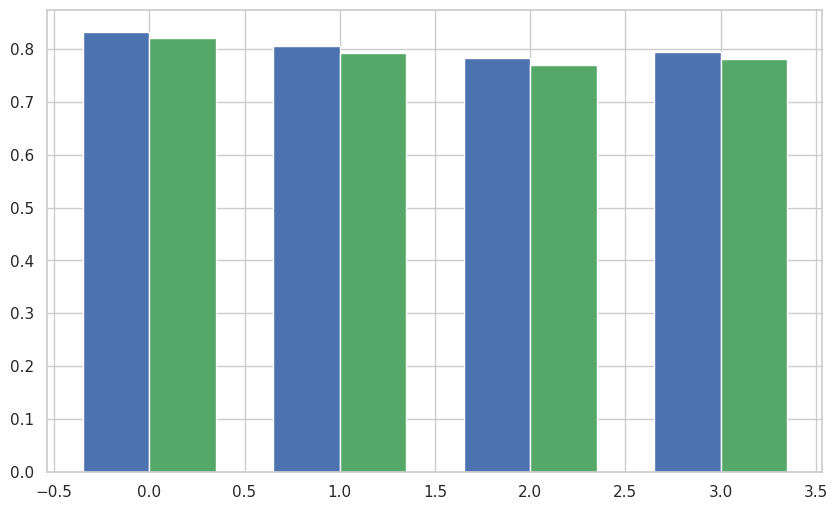

In [53]:
# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='b')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='g')


In [54]:
# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: LightGBM vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [55]:
# Adding labels on the bars
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

1.**Visualization**:

1.The metrics are visualized using a bar chart for both models (LightGBM and XGBoost) to give a clear side-by-side comparison of their performance.

2.Each performance metric (accuracy, precision, recall, F1-score) is represented as a bar for both models.

2.**Interpretation of Results**:

1.Accuracy: Measures overall correctness. Both models should perform similarly based on previous accuracy results (around 83-84%)

2.Precision: High precision means fewer false positives. If XGBoost has higher precision, it is better at avoiding misclassifying non-survivors as survivors.

3.Recall: High recall means fewer false negatives, which indicates how well the model captures the actual survivors. A higher recall for LightGBM may suggest it is better at identifying survivors.

3.F1-Score: Balances precision and recall. A higher F1-Score means the model maintains a good balance between identifying survivors and avoiding false positives.

# Conclusion:

1.After evaluating and visualizing the performance,  We can see the strengths and weaknesses of each model.
 For example:
XGBoost may have slightly better precision but lower recall, meaning it’s good at avoiding false positives but might miss some survivors.

LightGBM might perform better in recall but could have a slightly lower precision.